# Nike Shoes Analysis
- Data: Scrapped products, characteristics, descriptions, ratings, and reviews of the shoes section of the Nike website for both male and female products. Acquired data on over 1,200 products and more than 30 thousand reviews.
- Objective: To understand the product offering of Nike, its composition in terms of quantity, price and type of products. As well as, to understand it's perceived strengths, weaknesses, and how it delivers value to its clients.

## Table of Contents:
* [Install Required Packages](#1-bullet)
* [Importing Data and Cleaning](#2-bullet)
* [Numerical and Categorical Analysis and Graphs](#3-bullet)
* [Natural language processing (NLP)](#4-bullet)

## Install Required Packages <a class="anchor" id="1-bullet"></a>

- Open **Terminal/Anaconda Prompt**, cd to the project and run the following command:
 - `pip install -r requirements.txt`

- After installing all the required packages, run the following command:
 - `python -m textblob.download_corpora`
 
- Restart this jupyter notebook.

## Importing Data and Cleaning <a class="anchor" id="2-bullet"></a>

In [19]:
# Import libraries to be used

import pandas as pd
import datetime
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns
import squarify
plt.style.use('ggplot')
import re
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import nltk
import json
import string
import requests
import urllib.request
%matplotlib inline
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\ASHISH
[nltk_data]     KUMAR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\ASHISH
[nltk_data]     KUMAR\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
# Getting all the data from the csv files and joining them

df_men = pd.read_csv('./nike_shoes_men.csv')
df_woman0 = pd.read_csv('./nike_shoes_woman0.csv')
df_woman1 = pd.read_csv('./nike_shoes_woman1.csv')

df = pd.concat([df_men, df_woman0, df_woman1])


In [21]:
df.head()

,id_,gender,title,url,category,price,description,description_long,n_reviews,score,size,comfort,durability,r_title,r_raiting,r_body,r_date
0,1,men,Nike Mercurial Dream Speed Superfly 8 Elite FG,https://www.nike.com/t/mercurial-dream-speed-s...,Firm-Ground Soccer Cleat,295.0,"With a new look inspired by Cristiano Ronaldo,...",LOOK FAST. PLAY FAST.With a new look inspired ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,men,Nike Air Force 1/1 Unlocked By You,https://www.nike.com/u/custom-nike-air-force-1...,Custom Shoe,180.0,The Nike Air Force 1/1 Unlocked By You is a cu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,men,Nike Force Zoom Trout 7 Turf,https://www.nike.com/t/force-zoom-trout-7-turf...,Men's Baseball Shoe,120.0,The Nike Force Zoom Trout 7 Turf uses a revolu...,SNEAKER FEEL FOR THE FIELD.The Nike Force Zoom...,1.0,5.0,NaN,NaN,NaN,Awesome grip,5.0,Bought these from the mall about a week ago an...,12-02-2021 00:00
3,4,men,Nike Force Zoom Trout 7,https://www.nike.com/t/force-zoom-trout-7-mens...,Men's Baseball Cleat,130.0,Designed to contain the incredible speed and p...,"SPEED, RESPONSE AND POWER.Designed to contain ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,men,Nike Air VaporMax Evo,https://www.nike.com/t/air-vapormax-evo-mens-s...,Men's Shoe,200.0,The Nike Air VaporMax Evo puts Air Max DNA und...,SHOWCASING THE FINEST OF AIR MAX.The Nike Air ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df.isnull().sum()

id_                    0
gender                 0
title                 10
url                    0
category              10
price                 10
description           10
description_long     146
n_reviews            441
score                441
size                 462
comfort              462
durability           462
r_title             2321
r_raiting            441
r_body               441
r_date               441
dtype: int64

In [23]:
# Replace slider values that are not correct
df = df.replace('[A-Za-z]', value = {"size" : None, "comfort" : None, "durability" : None}, regex=True)

In [24]:
df[df['size'].str.contains('[A-Za-z]', na=False)]

,id_,gender,title,url,category,price,description,description_long,n_reviews,score,size,comfort,durability,r_title,r_raiting,r_body,r_date


In [25]:
for i in df['category'].unique():
    print(i)

Firm-Ground Soccer Cleat
Custom Shoe
Men's Baseball Shoe
Men's Baseball Cleat
Men's Shoe
Men's Trail Running Shoe
Golf Shoe (Wide)
Custom Men's Shoe
Hiking Shoe
Indoor/Court Soccer Shoe
nan
Multi-Ground Soccer Cleat
Basketball Shoe
Skate Shoe
Custom Men's Running Shoe
Men's Football Cleat
Men's Shoes
Women's Shoe
Running Shoe
Men's Hard Court Tennis Shoe
Men's Running Shoe
Turf Soccer Shoe
Artificial-Turf Soccer Shoe
Men's Slide
Duck Boot
Shoe
Men's HIIT Class Shoe
Men's Training Shoe
Men's Endurance Class Shoe
Training Shoe
Men’s Hard Court Tennis Shoe
Custom Soccer Cleat
Men's Golf Shoe (Wide)
Men's Golf Shoe
Women's Racing Shoe
Men's Printed Slide
Men's Boot
Custom Basketball Shoe
Golf Shoe
Turf Lacrosse Cleat
Men's Skate Shoe
Custom Running Shoe
Men's Shower Slide
Track Spike
Men's Flip Flop
Men's Trail Shoe
Custom Lifestyle Shoe
Unisex Throwing Shoe
Men's Indoor Cycling Shoe
Racing Spike
Unisex Jumping Spike
Racing Shoe
Unisex Throwing Spike
Racing Spikes
Unisex Track Spike
Men's 

In [26]:
# Create more meaningful categories by deleting redundancy, aggregating similar categories,
# and adding more informative categories

df = df.replace({'category' : { 'Shoe' : "Men's Shoe", "Men's Shoes" : "Men's Shoe"}})
df = df.replace({'category' : { ".+Running.+" : "Running Shoe"}}, regex = True)
df = df.replace({'category' : { ".+Basketball.+" : "Basketball Shoe"}}, regex = True)
df = df.replace({'category' : { "Basketball.+" : "Basketball Shoe"}}, regex = True)
df = df.replace({'category' : { ".+Baseball.+" : "Baseball Shoe"}}, regex = True)
df = df.replace({'category' : { "Baseball.+" : "Baseball Shoe"}}, regex = True)
df = df.replace({'category' : { ".+Hiking.+" : "Hiking Shoe"}}, regex = True)
df = df.replace({'category' : { "HIIT.+" : "Training Shoe"}}, regex = True)
df = df.replace({'category' : { ".+Skate.+" : "Skate Shoe"}}, regex = True)
df = df.replace({'category' : { ".+Football.+" : "Football Shoe"}}, regex = True)
df = df.replace({'category' : { "Football.+" : "Football Shoe"}}, regex = True)
df = df.replace({'category' : { ".+Slide.+" : "Sandal"}}, regex = True)
df = df.replace({'category' : { "Slide" : "Sandal"}}, regex = True)
df = df.replace({'category' : { ".+Boot.+" : "Boot"}}, regex = True)
df = df.replace({'category' : { ".+Boot$" : "Boot"}}, regex = True)
df = df.replace({'category' : { ".+Lacrosse.+" : "Lacrosse Shoe"}}, regex = True)
df = df.replace({'category' : { "Lacrosse.+" : "Lacrosse Shoe"}}, regex = True)
df = df.replace({'category' : { ".+Lifestyle.+" : "Lifestyle Shoe"}}, regex = True)
df = df.replace({'category' : { ".+Cycling.+" : "Cycling Shoe"}}, regex = True)
df = df.replace({'category' : { ".+Thong.+" : "Sandal"}}, regex = True)
df = df.replace({'category' : { "Thong" : "Sandal"}}, regex = True)
df = df.replace({'category' : { ".+Flip Flop.+" : "Sandal"}}, regex = True)
df = df.replace({'category' : { "Flip Flop" : "Sandal"}}, regex = True)
df = df.replace({'category' : { "Flip-Flop" : "Sandal"}}, regex = True)
df = df.replace({'category' : { ".+Sandal.+" : "Sandal"}}, regex = True)
df = df.replace({'category' : { ".+Sandal" : "Sandal"}}, regex = True)
df = df.replace({'category' : { ".+Slide" : "Sandal"}}, regex = True)
df = df.replace({'category' : { "Slip$" : "Sandal"}}, regex = True) 
df = df.replace({'category' : { "^Slip-On$" : "Sandal"}}, regex = True)
df = df.replace({'category' : { ".+Softball.+" : "Softball Shoe"}}, regex = True)
df = df.replace({'category' : { "Softball.+" : "Softball Shoe"}}, regex = True)                
df = df.replace({'category' : { ".+Golf.+" : "Golf Shoe"}}, regex = True)
df = df.replace({'category' : { "Golf.+" : "Golf Shoe"}}, regex = True)
df = df.replace({'category' : { ".+Soccer.+" : "Soccer Shoe"}}, regex = True)
df = df.replace({'category' : { ".+Tennis.+" : "Tennis Shoe"}}, regex = True)
df = df.replace({'category' : { ".+Training.+" : "Training Shoe"}}, regex = True)
df = df.replace({'category' : { "Custom.+" : "Custom Shoe"}}, regex = True)
df = df.replace({'category' : { "High Top" : "Lifestyle Shoe"}}, regex = True)
df = df.replace({'category' : { "Lifestyle Shoe \(Extra Wide\)" : "Lifestyle Shoe"}}, regex = True)
df = df.replace({'category' : { "Print Slide" : "Printed Slide"}}, regex = True)
df = df.replace({'category' : { "Racing.+" : "Racing Shoe"}}, regex = True)
df = df.replace({'category' : { "Unisex Racing Shoe" : "Racing Shoe"}}, regex = True)
df = df.replace({'category' : { ".+Track.+" : "Track Shoe"}}, regex = True)
df = df.replace({'category' : { "^Track Spike$" : "Track Shoe"}}, regex = True)
df = df.replace({'category' : { "Unisex Shoe" : "Lifestyle Shoe"}}, regex = True)
df['category'] = df['category'].str.replace("Men's","")
df['category'] = df['category'].str.replace("Women's","")
df['category'] = df['category'].str.strip()
df = df.replace({'category' : { "^Shoe" : "Lifestyle Shoe"}}, regex = True)

## Handling missing values

In [27]:
# Getting an idea of where the missing values are

df.isnull().sum()

id_                    0
gender                 0
title                 10
url                    0
category              10
price                 10
description           10
description_long     146
n_reviews            441
score                441
size                 822
comfort              822
durability           822
r_title             2321
r_raiting            441
r_body               441
r_date               441
dtype: int64

There are 10 items that could not be scraped correctly because the HTML formating on the page changed. Also some items don't have long descriptions, reviews, a size/comfort/durability slider result.

We should drop the 10 items out of the list because they won't provide any value, its a small part of the total of over 1,200 products. Also the other missing values are correct because they are not present in the product page, not all fields have information in the product page.

In [28]:
df.dropna(subset=['title'], inplace=True)

## Numerical and Categorical Analysis and Graphs <a class="anchor" id="3-bullet"></a>

In [29]:
# Histogram of Features
# df.hist(bins = 20, figsize= (20,15))

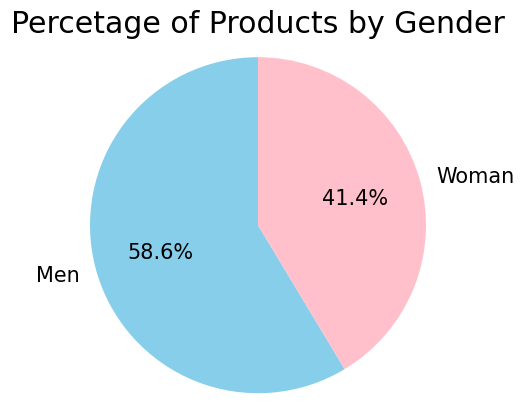

In [30]:
# Pie chart of distribuition of products by gender

products_men = df[df['gender'] == 'men']['id_'].nunique()
products_woman = df[df['gender'] == 'woman']['id_'].nunique()
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Men', 'Woman'
sizes = [products_men, products_woman]

fig1, ax1 = plt.subplots()
plt.rcParams['font.size'] = 15.0
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=('skyblue','pink'))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percetage of Products by Gender')
plt.savefig('pie1.png', dpi=300)
plt.show()

C:\Users\ASHISH KUMAR\AppData\Local\Temp\ipykernel_16816\236028791.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  labels = df1.apply(lambda x: str(x[0]) + "\n (" + str(round(x[1],1)) + "%)", axis=1)


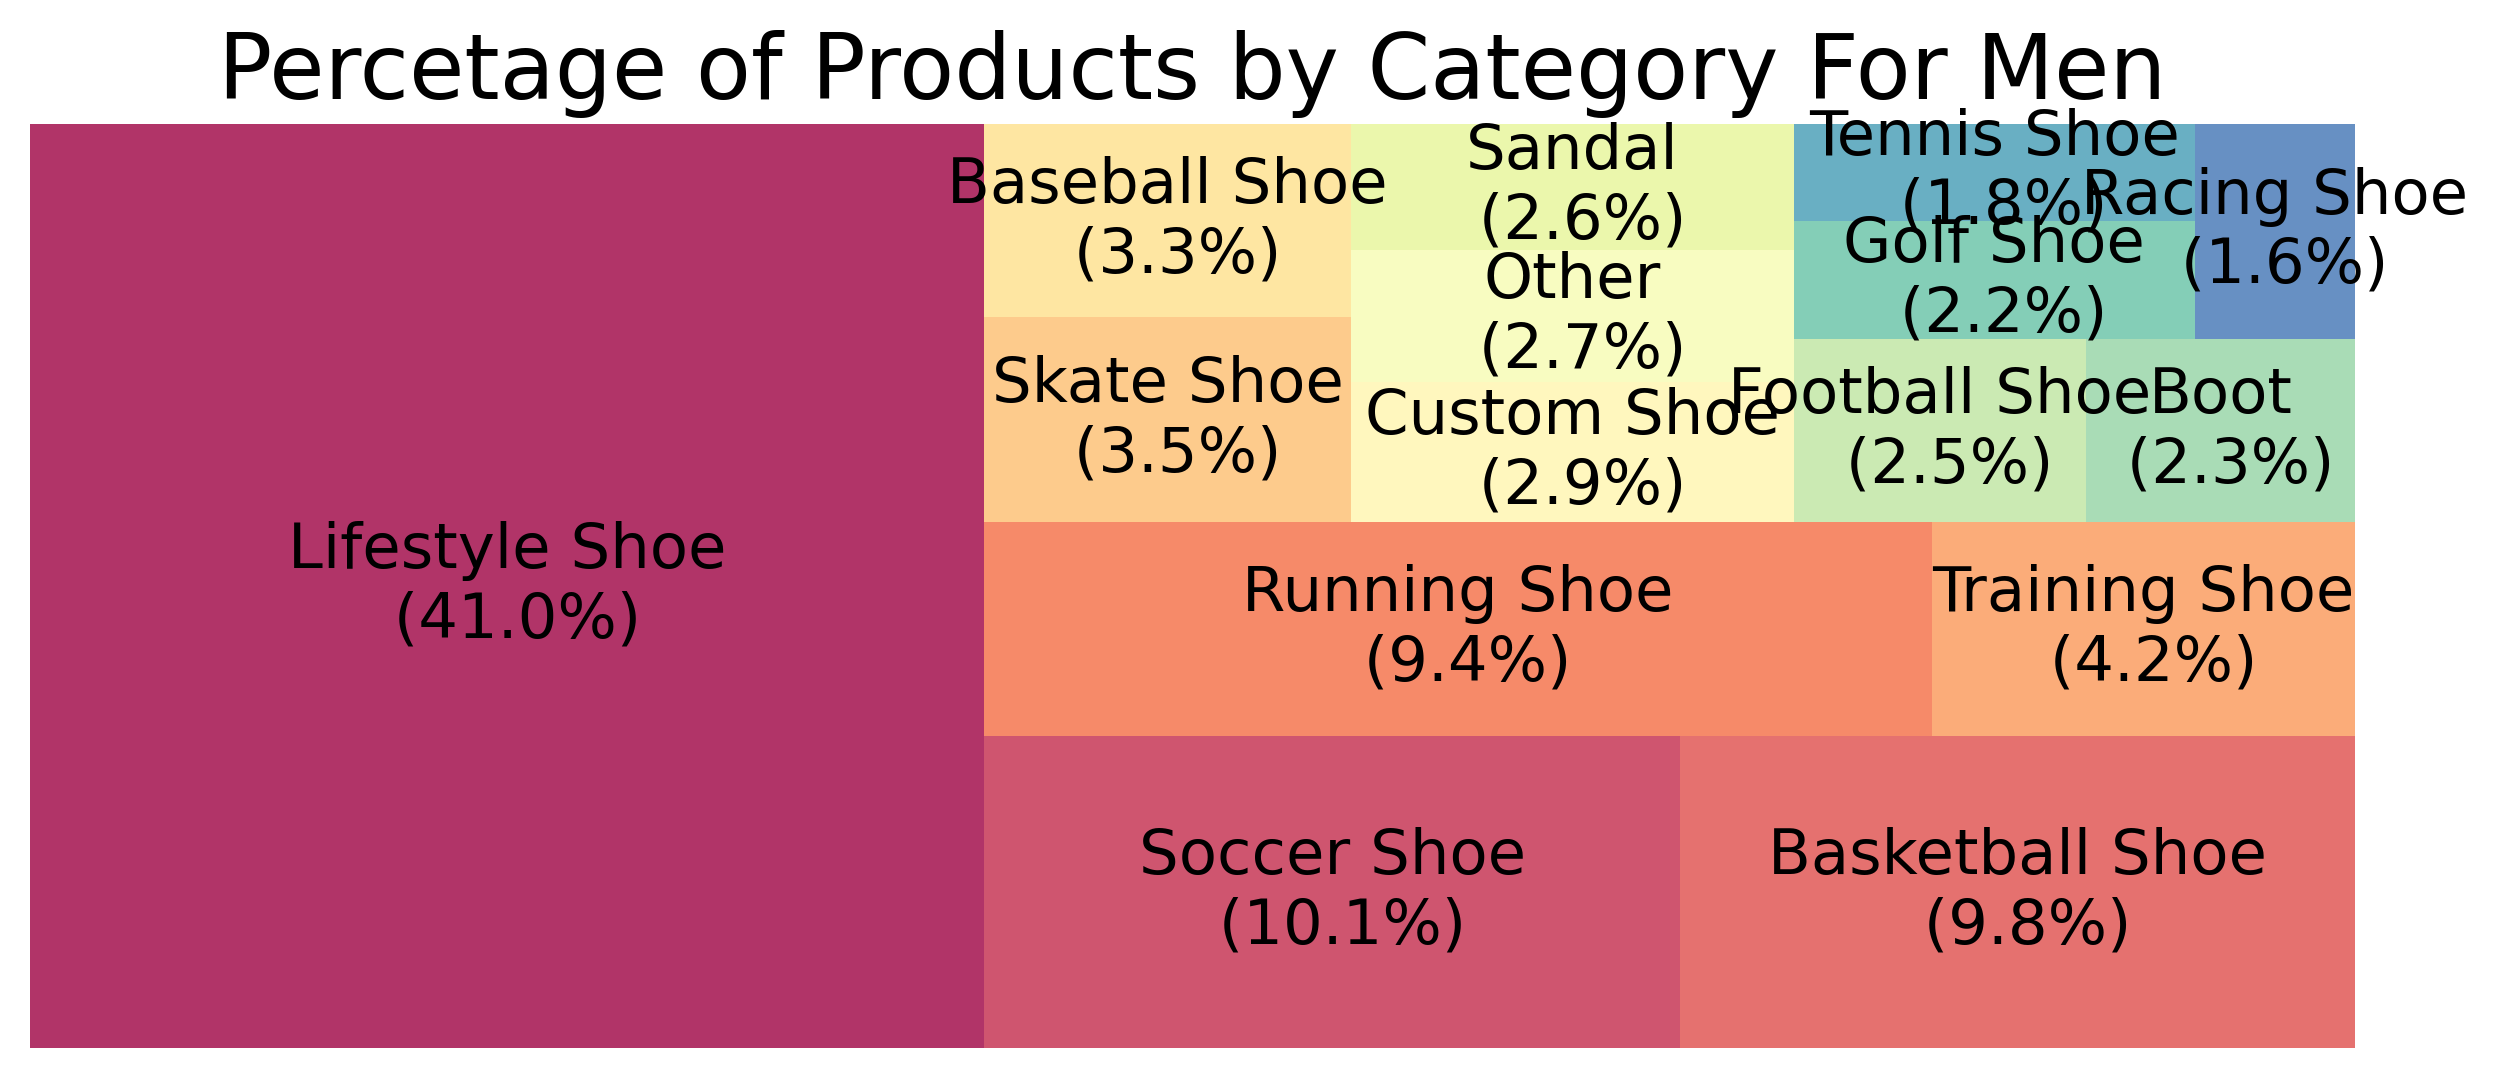

In [31]:
# 1. Treemap of percentage of products per category for men
df1 = df[df['gender']=='men'].groupby('category')['id_'].nunique().reset_index(name='counts')
df1['counts'] = (100. * df1['counts'] / df1['counts'].sum()).round(1)
df1['category'] = np.where(df1.counts < 1,'Other', df1.category)
df1 = df1.groupby('category').sum().sort_values(by = 'counts', ascending=False).reset_index()
labels = df1.apply(lambda x: str(x[0]) + "\n (" + str(round(x[1],1)) + "%)", axis=1)
sizes = df1['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(10,4), dpi= 300)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Percetage of Products by Category For Men')
plt.axis('off')
plt.show()

C:\Users\ASHISH KUMAR\AppData\Local\Temp\ipykernel_16816\2203672492.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  labels = df1.apply(lambda x: str(x[0]) + "\n (" + str(round(x[1],1)) + "%)", axis=1)


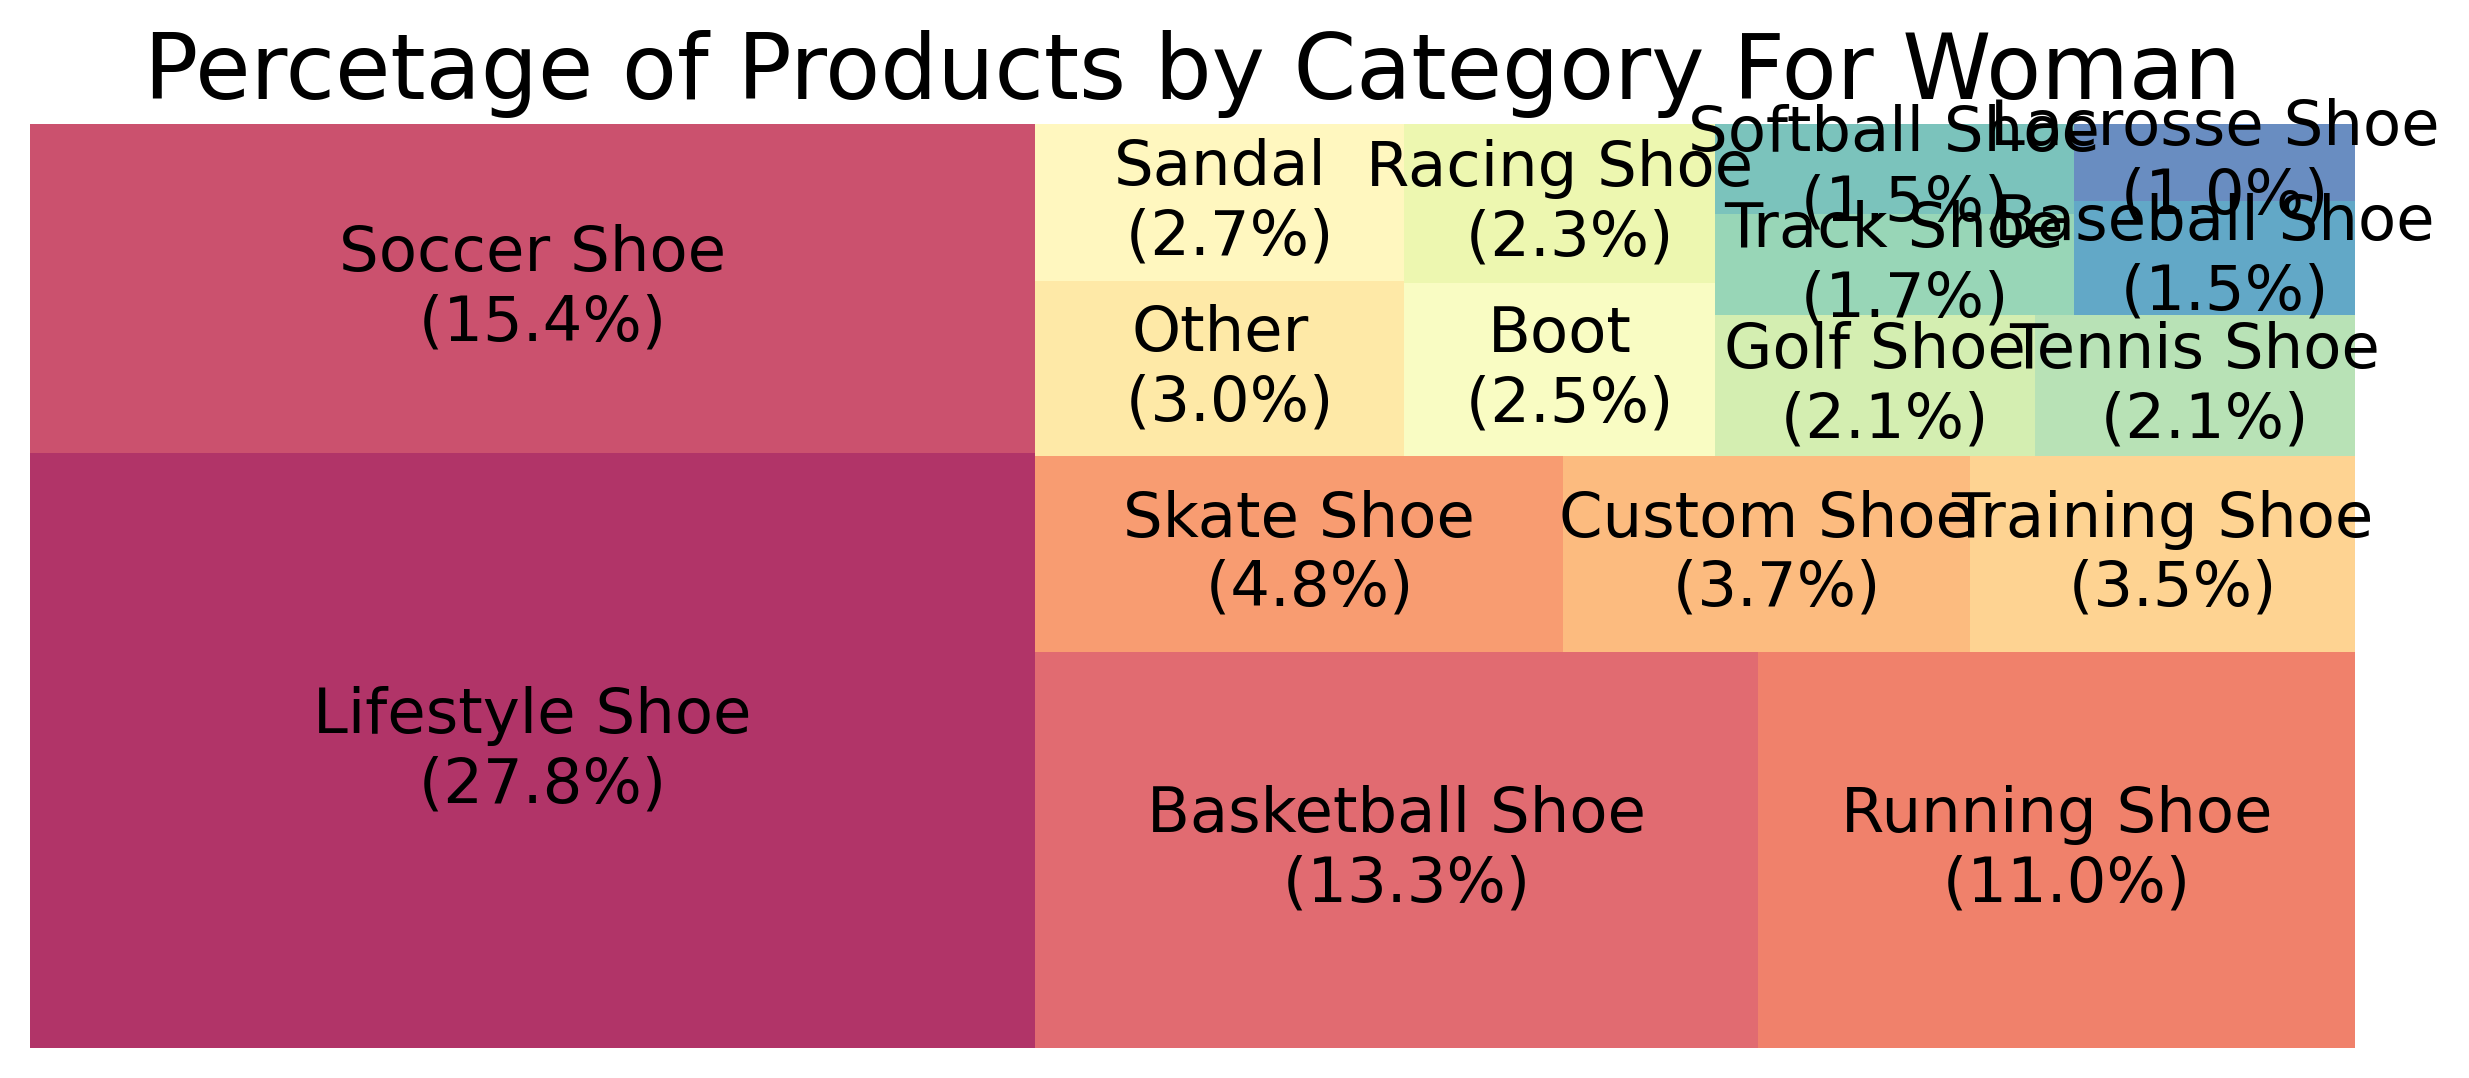

In [32]:
# 1. Treemap of percentage of products per category for woman
df1 = df[df['gender']=='woman'].groupby('category')['id_'].nunique().reset_index(name='counts')
df1['counts'] = (100. * df1['counts'] / df1['counts'].sum()).round(1)
df1['category'] = np.where(df1.counts < 1,'Other', df1.category)
df1 = df1.groupby('category').sum().sort_values(by = 'counts', ascending=False).reset_index()
labels = df1.apply(lambda x: str(x[0]) + "\n (" + str(round(x[1],1)) + "%)", axis=1)
sizes = df1['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(10,4), dpi= 300)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Percetage of Products by Category For Woman')
plt.axis('off')
plt.show()

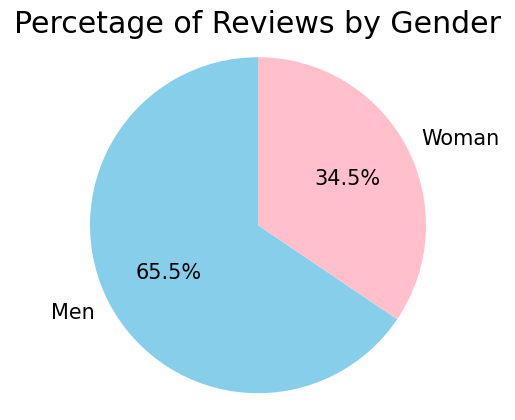

In [33]:
# 2. Pie chart of distribuition of reviews by gender

reviews_men = df[(df['gender'] == 'men') & (~df['n_reviews'].isnull())]['id_'].count()
reviews_woman = df[(df['gender'] == 'woman') & (~df['n_reviews'].isnull())]['id_'].count()

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Men', 'Woman'
sizes = [reviews_men, reviews_woman]
plt.rcParams['font.size'] = 15.0
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=('skyblue','pink'))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percetage of Reviews by Gender')
plt.savefig('pie2.png', dpi=300)
plt.show()

In [34]:
# 2. Bar graph of number of reviews per category for Men

# a = df[(df['gender'] == 'men') & (~df['n_reviews'].isnull())].category.value_counts(normalize=True).head(10)
# print(round((a*100),1))
# plt.figure(figsize=(12,6), dpi=500)
# a.plot.bar(color='b').set_facecolor('xkcd:white')
# plt.ylabel('Number of Products')
# plt.title('Number of Reviews per Category ')

C:\Users\ASHISH KUMAR\AppData\Local\Temp\ipykernel_16816\2198210456.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  labels = df1.apply(lambda x: str(x[0]) + "\n (" + str(round(x[1],1)) + "%)", axis=1)


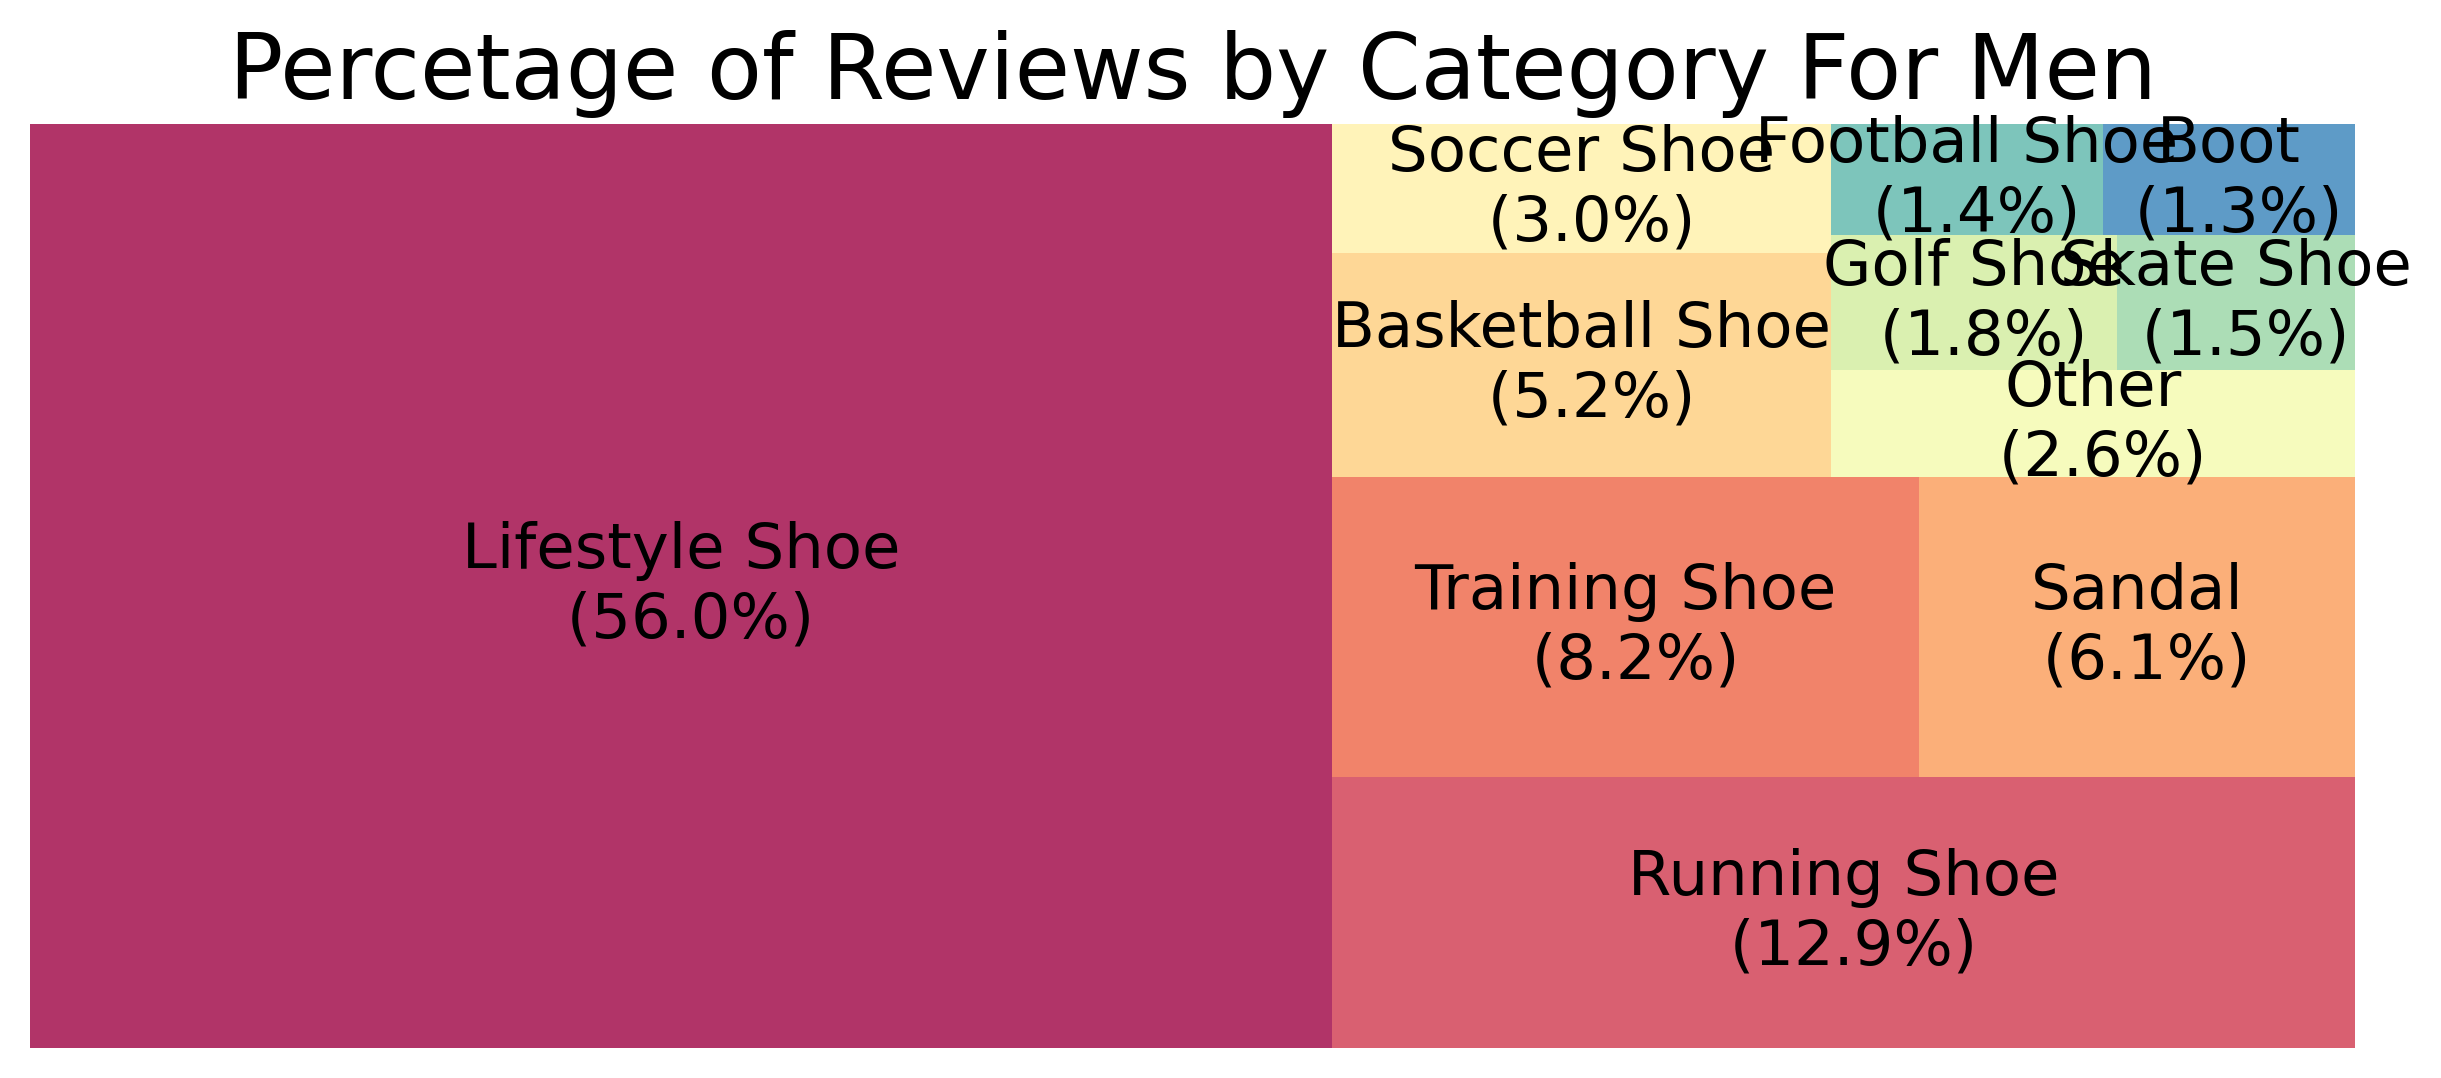

In [35]:
# 2. Treemap of percentage of reviews per category for men
df1 = df[(df['gender']=='men') & (~df['n_reviews'].isnull())].groupby('category').size().reset_index(name='counts')
df1['counts'] = (100. * df1['counts'] / df1['counts'].sum()).round(1)
df1['category'] = np.where(df1.counts < 1,'Other', df1.category)
df1 = df1.groupby('category').sum().sort_values(by = 'counts', ascending=False).reset_index()
labels = df1.apply(lambda x: str(x[0]) + "\n (" + str(round(x[1],1)) + "%)", axis=1)
sizes = df1['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(10,4), dpi= 300)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Percetage of Reviews by Category For Men')
plt.axis('off')
plt.show()

C:\Users\ASHISH KUMAR\AppData\Local\Temp\ipykernel_16816\1275952470.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  labels = df1.apply(lambda x: str(x[0]) + "\n (" + str(round(x[1], 1)) + "%)", axis=1)


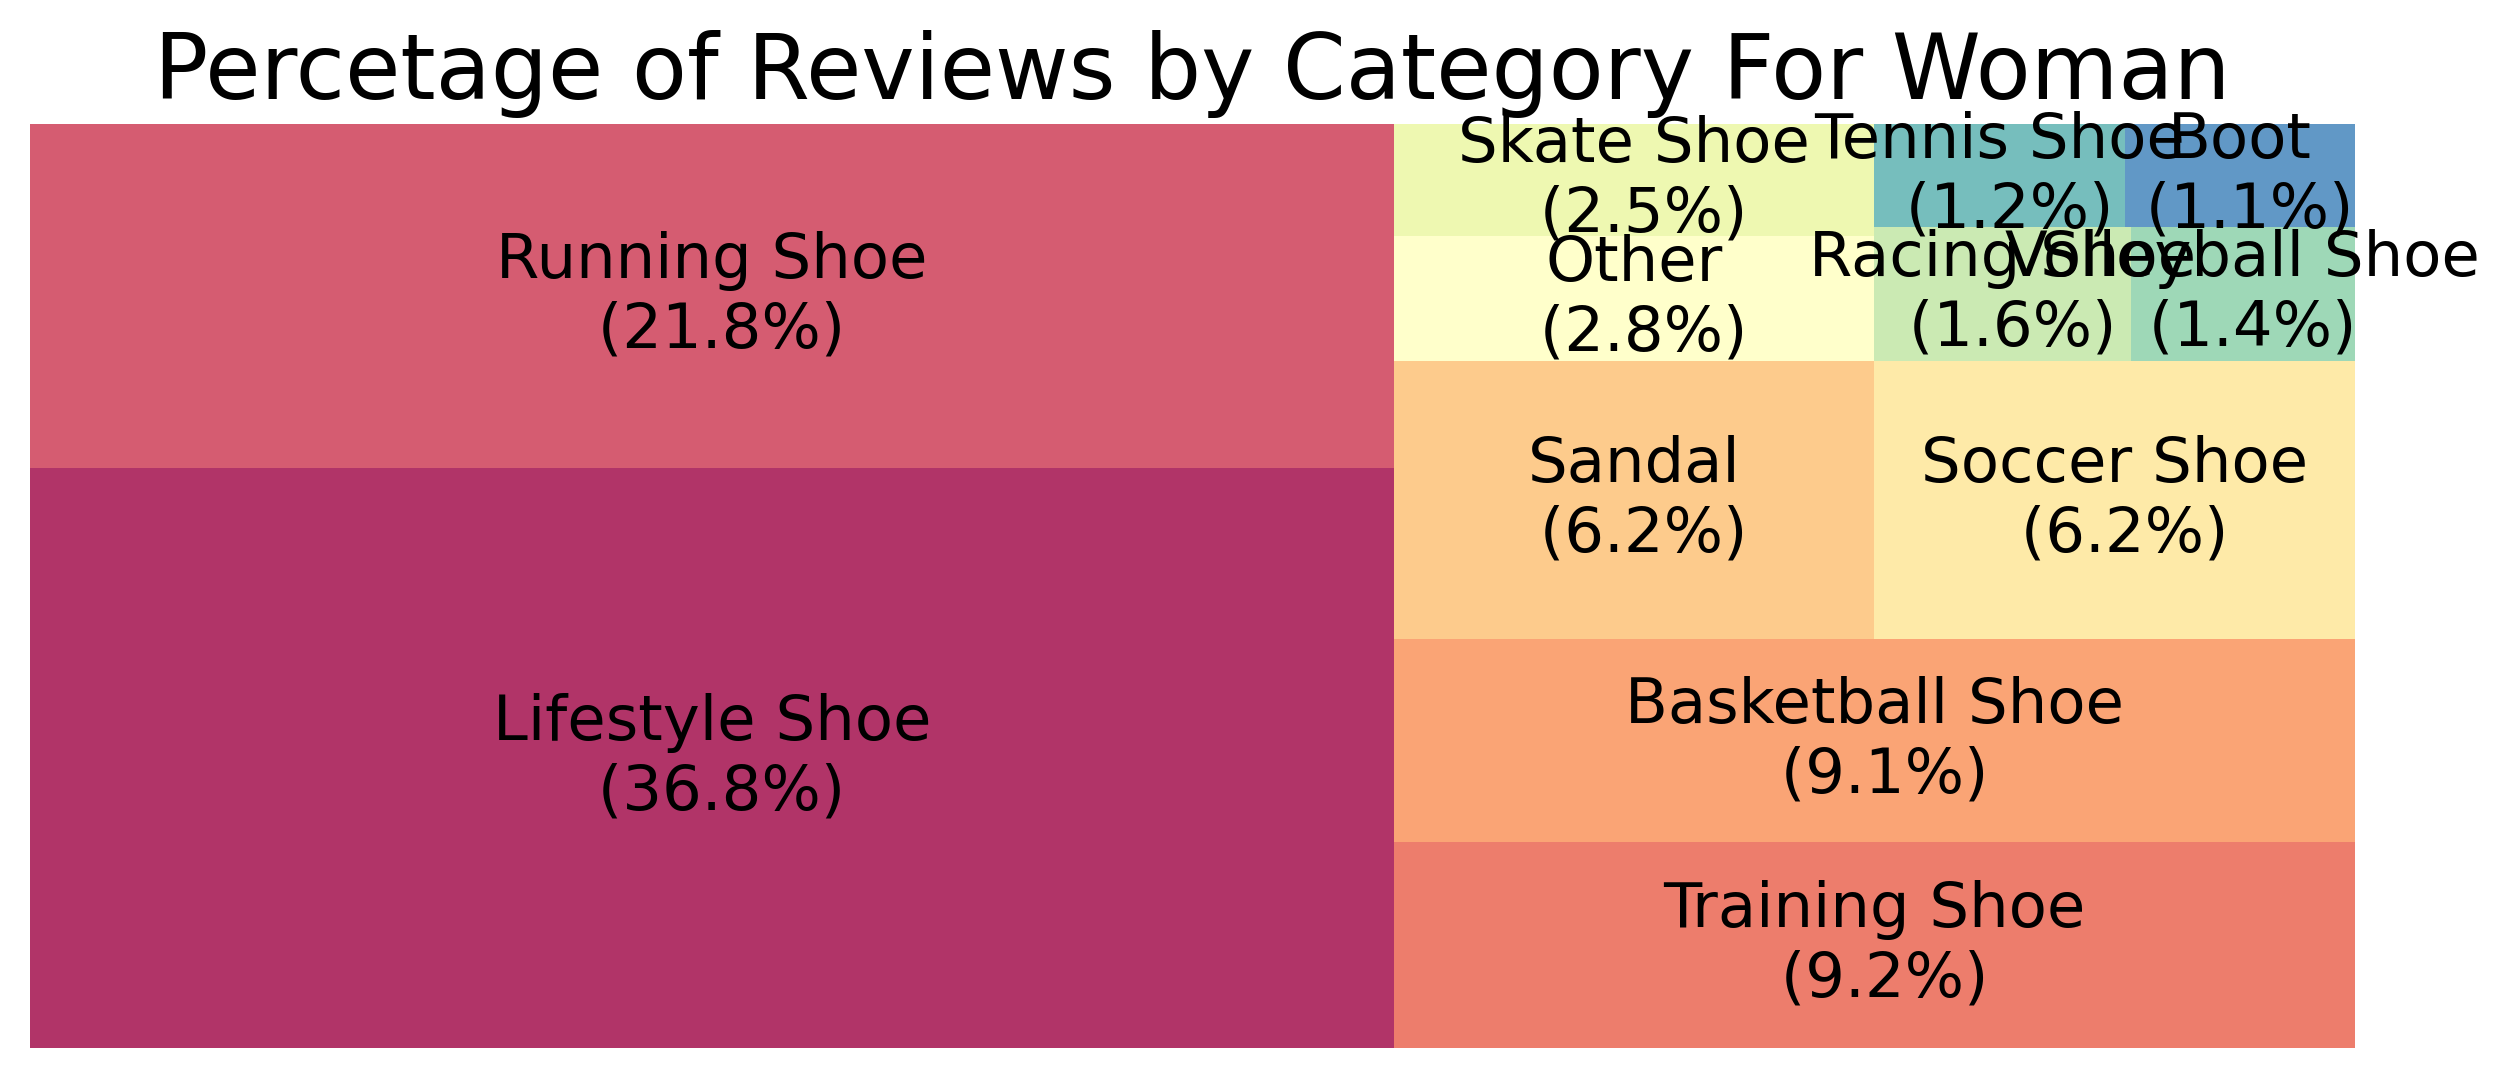

In [36]:
# 1. Treemap of percentage of reviews per category for woman
df1 = df[(df['gender']=='woman') & (~df['n_reviews'].isnull())].groupby('category').size().reset_index(name='counts')
df1['counts'] = (100. * df1['counts'] / df1['counts'].sum()).round(1)
df1['category'] = np.where(df1.counts < 1,'Other', df1.category)
df1 = df1.groupby('category').sum().sort_values(by = 'counts', ascending=False).reset_index()
labels = df1.apply(lambda x: str(x[0]) + "\n (" + str(round(x[1], 1)) + "%)", axis=1)
sizes = df1['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(10,4), dpi= 300)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Percetage of Reviews by Category For Woman')
plt.axis('off')
plt.show()

In [37]:
# 2. Pie chart of number of reviews per category by Gender

# Preparing the data
df_men = df[(df['gender']=='men') & (~df['n_reviews'].isnull())].groupby('category').size().reset_index(name='counts')
df_men['counts'] = (100. * df_men['counts'] / df_men['counts'].sum()).round(1)
df_men['category'] = np.where(df_men.counts < 1,'Other', df_men.category)
df_men = df_men.groupby('category').sum().reset_index()

df_woman = df[(df['gender']=='woman') & (~df['n_reviews'].isnull())].groupby('category').size().reset_index(name='counts')
df_woman['counts'] = (100. * df_woman['counts'] / df_woman['counts'].sum()).round(1)
df_woman['category'] = np.where(df_woman.counts < 2,'Other', df_woman.category)
df_woman = df_woman.groupby('category').sum().reset_index()

# Men pie chart
# df_men1 = df_men.groupby('category').mean().sort_values(by = 'counts', ascending=False)
# df_men1.plot(kind='pie', subplots=True, figsize=(8, 8))
# plt.title("Distribuition of Reviews by Category")
# plt.ylabel("")
# plt.show()

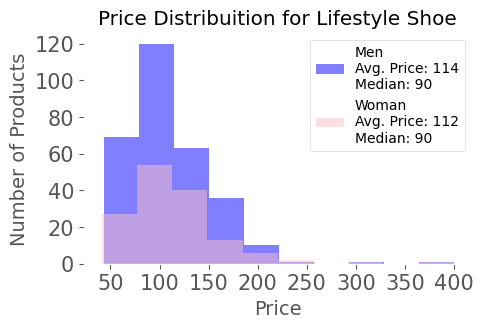

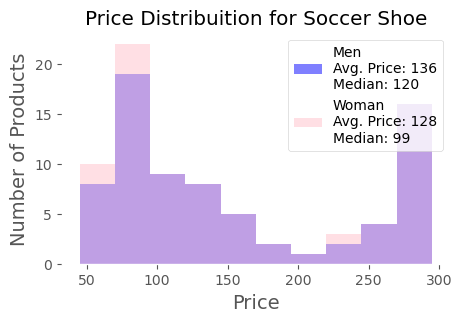

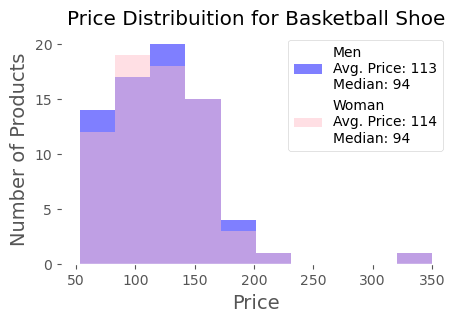

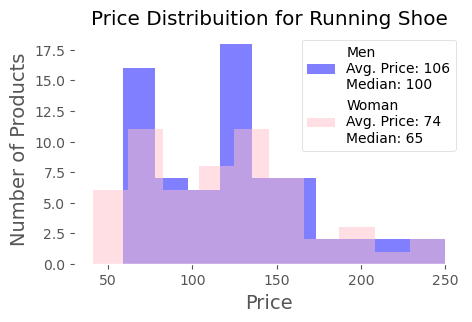

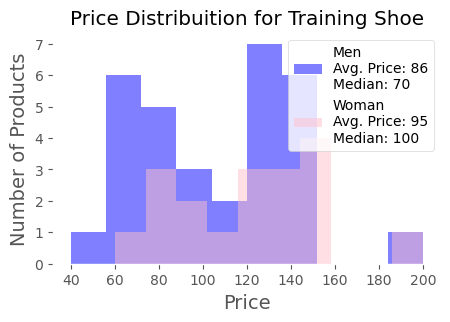

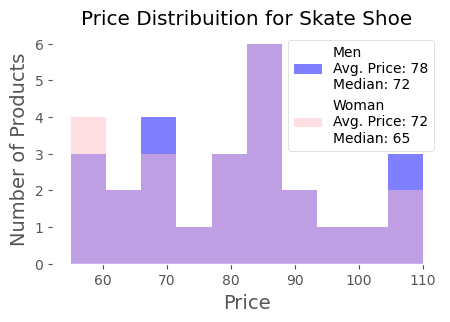

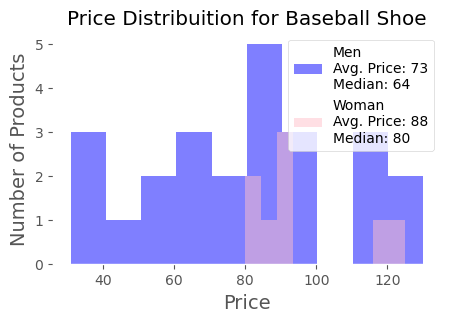

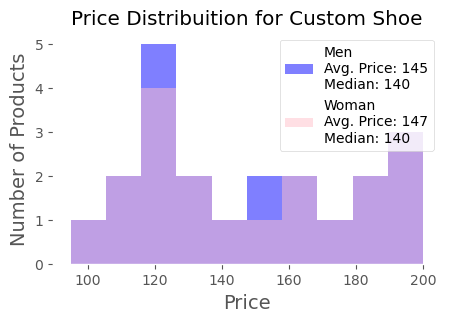

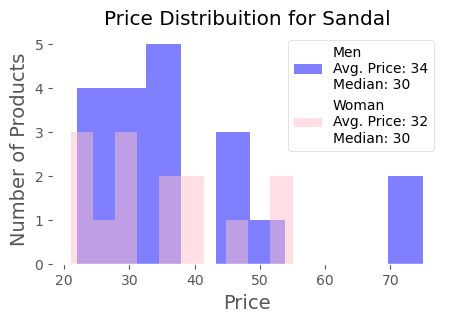

In [38]:
# 3. Histograms of prices by top categories overlapping gender per histogram.

categories = ['Lifestyle Shoe', 'Soccer Shoe', 'Basketball Shoe', 'Running Shoe','Training Shoe', 'Skate Shoe',
              'Baseball Shoe', 'Custom Shoe', 'Sandal']

for category in categories:
    # Organizing the data
    df1 = df[(df['gender']=='men') & (df['category']==category)].groupby('id_')['price'].mean()
    avg_price_men = str(round(df[(df['gender']=='men') & (df['category']==category)]['price'].mean()))
    median_price_men = str(round(df[(df['gender']=='men') & (df['category']==category)]['price'].median()))
    df2 = df[(df['gender']=='woman') & (df['category']==category)].groupby('id_')['price'].mean()
    avg_price_woman = str(round(df[(df['gender']=='woman') & (df['category']==category)]['price'].mean()))
    median_price_woman = str(round(df[(df['gender']=='woman') & (df['category']==category)]['price'].median()))
    
    # Plotting
    fig, ax = plt.subplots(figsize=(5,3), dpi= 100)
    plt.rcParams['font.size'] = 10
    plt.hist(df1, alpha=0.5, label="Men\nAvg. Price: "+avg_price_men+"\nMedian: "+median_price_men, color= 'blue')
    plt.hist(df2, alpha=0.5, label="Woman\nAvg. Price: "+avg_price_woman+"\nMedian: "+median_price_woman, color= 'pink')
    ax.set_facecolor("white")
    plt.xlabel("Price", size=14)
    plt.ylabel("Number of Products", size=14)
    plt.title("Price Distribuition for " + category)
    plt.legend(loc='upper right', facecolor='white')
    plt.savefig('hist_prices_'+category+'.png', dpi= 200, bbox_inches = 'tight')

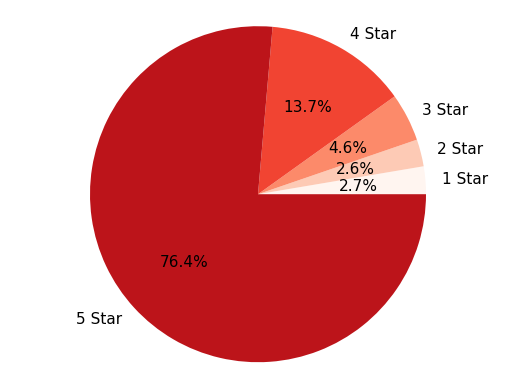

In [39]:
# 4. Pie chart of review distribuition by raiting

one_star = df[df['r_raiting'] == 1]['id_'].count()
two_star = df[df['r_raiting'] == 2]['id_'].count()
three_star = df[df['r_raiting'] == 3]['id_'].count()
four_star = df[df['r_raiting'] == 4]['id_'].count()
five_star = df[df['r_raiting'] == 5]['id_'].count()
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = '1 Star', '2 Star', '3 Star', '4 Star', '5 Star'
sizes = [one_star, two_star, three_star, four_star, five_star]

fig1, ax1 = plt.subplots()
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 11
colors = [plt.cm.Reds(i/float(len(labels))) for i in range(len(labels))]
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('pie_review_stars.png', dpi=300)
plt.show()

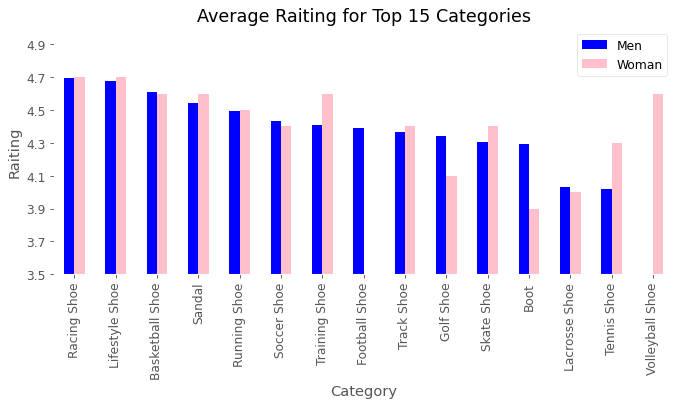

In [40]:
# 4. Bar chart average review score by category and gender

# Top categories by number of reviews
categories = df[(~df['n_reviews'].isnull())].groupby('category').agg({'r_raiting' : 'count'})\
.sort_values(by = 'r_raiting', ascending=False).reset_index().head(15)
categories = list(categories['category'])

# Data for men
avg_score_men = df[(df['gender'] == 'men') & (~df['n_reviews'].isnull()) & (df['category'].isin(categories))]\
.groupby('category').agg({'r_raiting' : 'mean'})
avg_score_men.dropna(inplace=True, axis=0)

# Data for woman
avg_score_woman = df[(df['gender'] == 'woman') & (~df['n_reviews'].isnull()) & (df['category'].isin(categories))]\
.groupby('category').agg({'r_raiting' : 'mean'})
avg_score_woman = round(avg_score_woman,1)
avg_score_woman.dropna(inplace=True, axis=0)

names=['Men', 'Woman']
df1 = pd.concat([avg_score_men, avg_score_woman], axis=1)
df1.columns = names

# Plotting
plt.rcParams["figure.dpi"] = 80
df1.sort_values(by = 'Men', ascending=False).plot(kind="bar",figsize=(10,4), color=('blue','pink')).set_facecolor('xkcd:white')
plt.ylabel('Raiting')
axes = plt.gca()
axes.set_ylim([3.5,5])
plt.yticks(np.arange(3.5, 5, 0.2))
plt.xlabel('Category')
plt.title('Average Raiting for Top 15 Categories')
plt.legend(loc='upper right', facecolor='white')
plt.savefig('reivew_score_by_category.png', dpi = 300, bbox_inches = 'tight')

## Natural language processing (NLP) <a class="anchor" id="4-bullet"></a>

In [41]:
# Creating a Corpus for the best and worst reviews

best_rev_corpus = ' '.join(df[df['r_raiting']>=(4)]['r_body']).lower()
worst_rev_corpus = ' '.join(df[df['r_raiting']<=(2)]['r_body']).lower()

# Lemantizing and eliminating stop words and punctuation

lemmatizer= WordNetLemmatizer()
extra_stop_filter = ['’', "'s", "n't", "part", "promotion", "collected"]
stop_filters = stopwords.words('english') + list(string.punctuation) + extra_stop_filter

best_rev_tokens = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(best_rev_corpus) if tokens not in stop_filters]
worst_rev_tokens = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(worst_rev_corpus) if tokens not in stop_filters]

fdist_best = FreqDist(best_rev_tokens)
fdist_worst = FreqDist(worst_rev_tokens)
fdist_best.most_common(20)
fdist_worst.most_common(20)

[('shoe', 1806),
 ('size', 475),
 ('foot', 420),
 ('read', 416),
 ('pair', 348),
 ('like', 338),
 ('nike', 317),
 ('wear', 290),
 ('bought', 289),
 ('fit', 274),
 ('look', 269),
 ('one', 265),
 ('month', 254),
 ('comfortable', 243),
 ('toe', 193),
 ('week', 191),
 ('would', 189),
 ('small', 185),
 ('time', 179),
 ('narrow', 174)]

In [42]:
# Bigrams Best Reviews

best_rev_bigram = list(nltk.bigrams(best_rev_tokens))
fdist_best_bi = FreqDist(best_rev_bigram)
fdist_best_bi.most_common(10)

[(('love', 'shoe'), 1675),
 (('true', 'size'), 1520),
 (('shoe', 'comfortable'), 1381),
 (('great', 'shoe'), 1264),
 (('comfortable', 'shoe'), 1242),
 (('half', 'size'), 937),
 (('son', 'love'), 774),
 (('look', 'great'), 748),
 (('shoe', 'great'), 744),
 (('bought', 'shoe'), 693)]

In [43]:
# Trigrams Best Reviews

best_rev_trigram = list(nltk.trigrams(best_rev_tokens))
fdist_best_tri = FreqDist(best_rev_trigram)
fdist_best_tri.most_common(10)

[(('fit', 'true', 'size'), 418),
 (('love', 'shoe', 'comfortable'), 226),
 (('true', 'size', 'comfortable'), 182),
 (('bought', 'month', 'ago'), 179),
 (('go', 'half', 'size'), 178),
 (('feel', 'like', 'walking'), 177),
 (('would', 'definitely', 'recommend'), 173),
 (('air', 'force', '1'), 170),
 (('comfortable', 'true', 'size'), 165),
 (('comfortable', 'shoe', 'ever'), 150)]

In [44]:
# Bigrams Worst Reviews

worst_rev_bigram = list(nltk.bigrams(worst_rev_tokens))
fdist_worst_bi = FreqDist(worst_rev_bigram)
fdist_worst_bi.most_common(10)

[(('read', 'shoe'), 53),
 (('half', 'size'), 51),
 (('bought', 'shoe'), 49),
 (('shoe', 'look'), 48),
 (('feel', 'like'), 47),
 (('month', 'ago'), 46),
 (('read', 'bought'), 42),
 (('wide', 'foot'), 41),
 (('nike', 'shoe'), 39),
 (('run', 'small'), 39)]

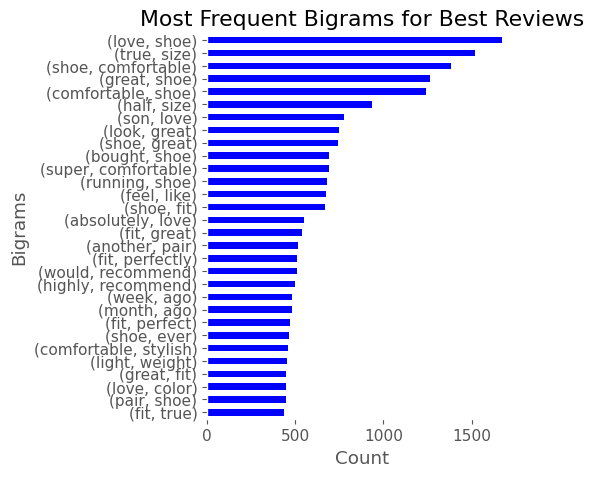

In [45]:
# Plotting best reviews bigram distribuition

plt.rcParams["figure.dpi"] = 100
pd.DataFrame(fdist_best_bi.most_common(30)[:], columns=['Tokens', 'Counts']).set_index('Tokens')\
.sort_values(by = 'Counts', ascending=True).plot(kind="barh",figsize=(4,5), color=('blue')).set_facecolor('xkcd:white')
axes = plt.gca()
axes.get_legend().remove()
plt.ylabel('Bigrams')
plt.xlabel('Count')
plt.title('Most Frequent Bigrams for Best Reviews')
plt.savefig('bigrams_best_reviews.png', dpi = 300, bbox_inches = 'tight')

# Removed top 3 because they are automated text that signals that the product was recieved for free as part of a promotion

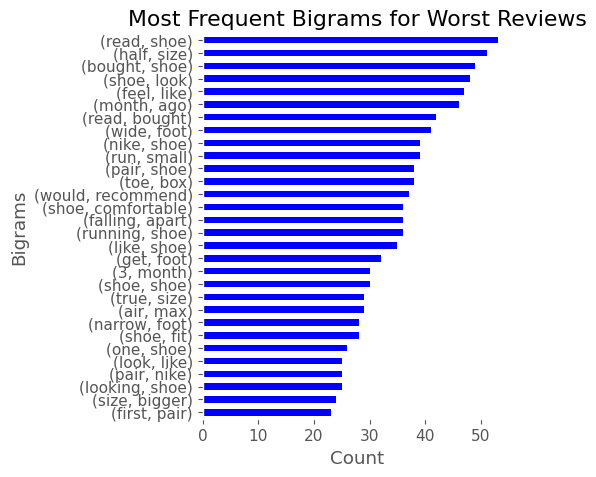

In [46]:
# Plotting worst reviews bigram distribuition

plt.rcParams["figure.dpi"] = 100
pd.DataFrame(fdist_worst_bi.most_common(30)[:], columns=['Tokens', 'Counts']).set_index('Tokens')\
.sort_values(by = 'Counts', ascending=True).plot(kind="barh",figsize=(4,5), color=('blue')).set_facecolor('xkcd:white')
axes = plt.gca()
axes.get_legend().remove()
plt.ylabel('Bigrams')
plt.xlabel('Count')
plt.title('Most Frequent Bigrams for Worst Reviews')
plt.savefig('bigrams_worst_reviews.png', dpi = 300, bbox_inches = 'tight')

# Removed top 3 because they are automated text that signals that the product was recieved for free as part of a promotion

In [47]:
# Get some context on text

# best_rated_text = nltk.Text(best_rev_corpus.split())
# best_rated_text.concordance('running', width=100)

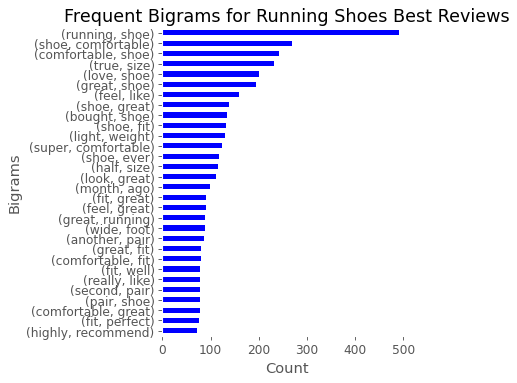

In [48]:
# Bigram analysis on best reviews for running shoes

best_running_rev_corpus = ' '.join(df[(df['r_raiting']>=(4)) & (df['category']=='Running Shoe')]['r_body']).lower()

# Lemantizing and eliminating stop words and punctuation

best_running_rev_tokens = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(best_running_rev_corpus)\
                           if tokens not in stop_filters]

fdist_running_best = FreqDist(best_running_rev_tokens)
fdist_running_best.most_common(20)

# Bigrams Best Reviews

best_running_rev_bigram = list(nltk.bigrams(best_running_rev_tokens))
fdist_best_running_bi = FreqDist(best_running_rev_bigram)
fdist_best_running_bi.most_common(10)

# Plotting best reviews bigram distribuition

plt.rcParams["figure.dpi"] = 80
pd.DataFrame(fdist_best_running_bi.most_common(30)[:], columns=['Tokens', 'Counts']).set_index('Tokens')\
.sort_values(by = 'Counts', ascending=True).plot(kind="barh",figsize=(4,5), color=('blue')).set_facecolor('xkcd:white')
axes = plt.gca()
axes.get_legend().remove()
plt.ylabel('Bigrams')
plt.xlabel('Count')
plt.title('Frequent Bigrams for Running Shoes Best Reviews')
plt.savefig('bigrams_running_best_reviews.png', dpi = 300, bbox_inches = 'tight')

In [49]:
# Get some context on comfortable

best_rated_running_text = nltk.Text(best_running_rev_corpus.split())
best_rated_running_text.concordance('comfortable', width=100)

Displaying 25 of 1413 matches:
ter. they have been read more in of the mos comfortable sneakers i try in the last few months very 
 sneakers i try in the last few months very comfortable and durable. look really good aswell would 
y pleased with these. have been looking for comfortable trainers that are waterproof for a while. t
perfectly fit the bill. great shoes, really comfortable and waterproof for the cold wet days. howev
he first time today and they were extremely comfortable and waterproof. first nike shoes that i hav
 them down and they look like new again. so comfortable when running, and keep you planted when off
o break in period with these shoes and were comfortable read more excellent fit, excellent comfort,
y look great. but more importantly they are comfortable and fit well. true to size for me, a 13. i 
, which lasted forever, but they weren't as comfortable as these. the nike pegasus gtx's fit my rea
in i would have with my old shoes. they are comfortable and support m

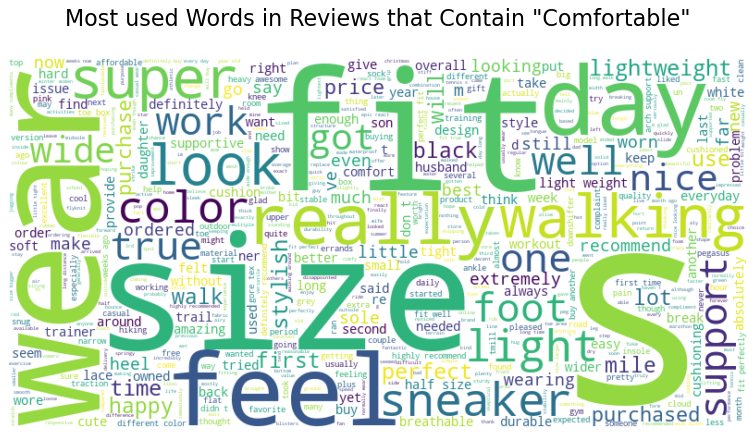

In [50]:
# Get most used words for the best reviews for running shoes that mention comfortable to get a better
# understanding of the context since this seems to be an importante feature among satisfied customers

comfortable_running_df = df[(df['r_body'].str.contains('comfortable', na=False)) & (df['category']=='Running Shoe')]

best_comf_reviews_corpus = ' '.join(comfortable_running_df[comfortable_running_df['r_raiting']>=4]['r_body']).lower()

# Adding other words that are not useful

extra_stop_filter2 = ['’', "'s", "n't", 'promotion', 'collected', 'comfortable', 'part', "'ve", 'shoe']
stop_filters = stopwords.words('english') + list(string.punctuation) + extra_stop_filter2

best_comf_tokens = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(best_comf_reviews_corpus)\
                    if tokens not in stop_filters]

# fdist_comf_running = FreqDist(best_comf_tokens)

# fdist_comf_running.most_common(50)
# best_comf_words_filtered = ' '.join([a for a in best_comf_reviews_corpus.split() if a not in stop_filters])

# Taking out words that do not help interpret

best_comf_words_filtered = best_comf_reviews_corpus.replace('comfortable', "").replace('shoe', "").replace('running', "")\
.replace('run', "").replace('great', "").replace('read', "").replace('part', "").replace('promotion', "").replace('love', "")\
.replace('feet', "").replace('nike', "").replace('good', "").replace('pair', "").replace('bought', "").replace('review', "")\
.replace('collected', "")

wc = WordCloud(background_color="white", max_words=2000, width=800, height=400)
# generate word cloud
wc.generate(best_comf_words_filtered)
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Most used Words in Reviews that Contain "Comfortable"\n',fontsize= 20)
plt.show()
# wc.to_file('wordcloud_comfort_running.png')

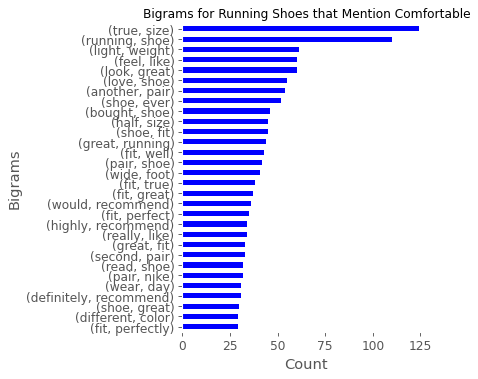

In [51]:
# Bigrams For Running Shoes Best Reviews that Mention Comfortable

comfort_bigram = list(nltk.bigrams(best_comf_tokens))
fdist_comfort_bi = FreqDist(comfort_bigram)
# fdist_comfort_bi.most_common(30)

# Plotting best reviews bigram distribuition

plt.rcParams["figure.dpi"] = 80
pd.DataFrame(fdist_comfort_bi.most_common(30)[:], columns=['Tokens', 'Counts']).set_index('Tokens')\
.sort_values(by = 'Counts', ascending=True).plot(kind="barh",figsize=(4,5), color=('blue')).set_facecolor('xkcd:white')
axes = plt.gca()
axes.get_legend().remove()
plt.ylabel('Bigrams')
plt.xlabel('Count')
plt.title('Bigrams for Running Shoes that Mention Comfortable',fontsize= 11)
plt.savefig('bigrams_comfort_running.png', dpi = 300, bbox_inches = 'tight')

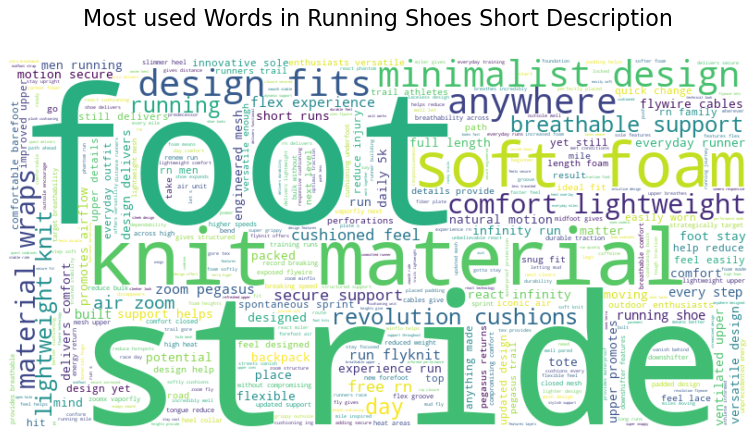

In [52]:
# Get most used words for the description of running shoes to get a better understanding of how Nike markets them

running_df = df[df['category']=='Running Shoe']

running_description_corpus = ' '.join(running_df['description']).lower()

# Taking out words that do not help interpret

running_description_words_filtered = running_description_corpus.replace('takes', '').replace('nike', '').replace('keep', '')

wc = WordCloud(background_color="white", max_words=2000, width=800, height=400)
# generate word cloud
wc.generate(running_description_words_filtered)
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Most used Words in Running Shoes Short Description\n',fontsize= 20)
plt.show()
# wc.to_file('wordcloud_running_description.png')

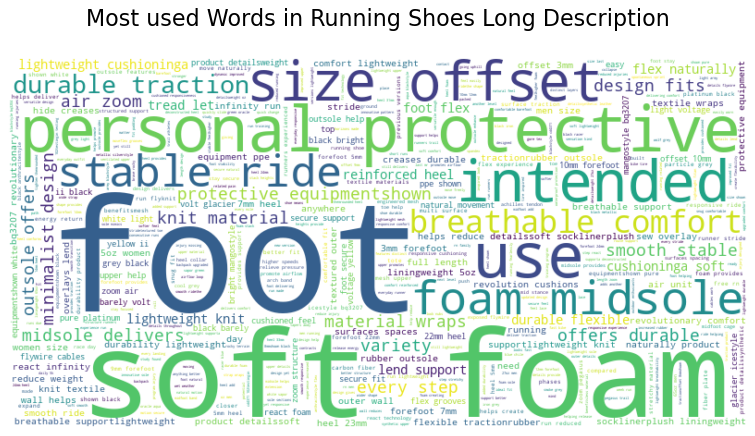

In [53]:
# Get most used words for the description long of running shoes to get a better understanding of how Nike markets them

running_df = df[df['category']=='Running Shoe']

running_description_corpus = ' '.join(running_df['description_long'].dropna()).lower()

# Taking out words that do not help interpret

running_description_words_filtered = running_description_corpus.replace('takes', '').replace('nike', '').replace('keep', '')

wc = WordCloud(background_color="white", max_words=2000, width=800, height=400)
# generate word cloud
wc.generate(running_description_words_filtered)
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.title('Most used Words in Running Shoes Long Description\n',fontsize= 20)
plt.axis("off")
plt.show()
# wc.to_file('wordcloud_running_description_long.png')